In [1]:
import pandas as pd 
import numpy as np


import seaborn as sns
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
df  = pd.read_csv('stocks/total_data_return_Symbol.csv', index_col = 'Symbol')
df_ = pd.read_csv('stocks/total_data_price_Symbol.csv', index_col='Symbol')
df.head()

,2019-02-01,2019-02-04,2019-02-05,2019-02-06,2019-02-07,2019-02-08,2019-02-11,2019-02-12,2019-02-13,2019-02-14,...,2019-12-17,2019-12-18,2019-12-19,2019-12-20,2019-12-23,2019-12-24,2019-12-26,2019-12-27,2019-12-30,2019-12-31
Symbol,,,,,,,,,,,,,,,,,,,,,
A,-0.000132,-0.000132,0.003676,-0.000131,-0.012794,0.006220,0.003687,0.012929,0.002333,-0.002982,...,-0.005938,-0.006213,0.012862,0.008014,0.000821,0.000469,0.001757,-0.000351,-0.003997,0.004818
AAL,0.009460,0.018384,0.006793,-0.004614,-0.016180,-0.004711,0.016256,-0.023225,0.012785,-0.002765,...,0.012812,-0.009950,0.019452,0.017017,0.008913,-0.004104,0.016653,-0.042340,-0.004935,0.013338
AAP,-0.001006,0.014420,0.000682,-0.026611,0.036901,-0.004423,0.016609,0.016576,-0.008554,0.013604,...,0.028768,0.000317,-0.009477,0.010426,0.011632,0.003744,-0.008129,-0.005793,0.004851,0.006515
AAPL,0.000481,0.028009,0.016965,0.000344,-0.019121,0.001174,-0.005768,0.008580,-0.004163,0.003637,...,0.001964,-0.002392,0.001000,-0.002073,0.016187,0.000950,0.019646,-0.000380,0.005918,0.007280
ABBV,0.002612,-0.024777,0.014663,-0.007684,0.001138,0.006296,0.001254,0.002004,0.010702,-0.003348,...,0.007242,-0.008361,-0.006289,0.005841,0.010694,-0.004442,-0.000223,-0.007038,-0.007652,0.000226


In [10]:
def calculate_timeseries_correlation(data):
    result = []
    days = data.shape[1]
    
    for i in range(len(data)):
        symbol_corr = []
        for j in range(len(data)):
            if i == j :
                symbol_corr.append(0)
                continue

            change = [1 if np.sign(data[i , day]) == np.sign(data[j , day])
                      else 0 
                      for day in range(days)]

            symbol_corr.append(sum(change))

        result.append(symbol_corr)
    return result

In [11]:
symbols = df.index
data = df.to_numpy()
correlation = calculate_timeseries_correlation(data)


In [12]:
df_corr = pd.DataFrame(correlation, columns = symbols , index = symbols) 
df_corr.head()

Symbol,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Symbol,,,,,,,,,,,,,,,,,,,,,
A,0,147,136,144,153,144,153,179,160,164,...,166,145,157,138,154,145,162,160,152,153
AAL,147,0,141,136,139,142,129,137,138,146,...,148,149,124,141,146,121,137,146,149,118
AAP,136,141,0,140,143,144,132,128,142,128,...,142,131,130,142,133,132,130,142,140,134
AAPL,144,136,140,0,144,141,141,141,143,147,...,149,146,130,140,136,134,135,149,145,141
ABBV,153,139,143,144,0,143,141,147,152,142,...,144,138,137,134,145,129,137,153,141,142


In [13]:
for col in df_corr.columns:
    print(col , df_corr[col].nlargest(3))

A Symbol
TMO    187
PKI    184
ABT    179
Name: A, dtype: int64
AAL Symbol
UAL    182
DAL    179
LUV    177
Name: AAL, dtype: int64
AAP Symbol
ORLY    169
GPC     163
AZO     162
Name: AAP, dtype: int64
AAPL Symbol
STX     167
SWKS    166
NVDA    164
Name: AAPL, dtype: int64
ABBV Symbol
MA      163
AMGN    159
APH     158
Name: ABBV, dtype: int64
ABC Symbol
MCK    183
CAH    179
CVS    173
Name: ABC, dtype: int64
ABMD Symbol
ISRG    163
RMD     163
TFX     159
Name: ABMD, dtype: int64
ABT Symbol
DHR    182
TMO    180
A      179
Name: ABT, dtype: int64
ACN Symbol
MA      178
PAYX    178
SNPS    177
Name: ACN, dtype: int64
ADBE Symbol
MSFT    183
V       180
MA      179
Name: ADBE, dtype: int64
ADI Symbol
MXIM    189
TXN     189
KLAC    181
Name: ADI, dtype: int64
ADM Symbol
PXD    164
WRK    164
EMR    163
Name: ADM, dtype: int64
ADP Symbol
V       182
INTU    180
MA      179
Name: ADP, dtype: int64
ADS Symbol
LNC     170
IPGP    168
BEN     167
Name: ADS, dtype: int64
ADSK Symbol
ADBE 

Name: DXC, dtype: int64
DXCM Symbol
NOW     164
ABMD    154
IQV     153
Name: DXCM, dtype: int64
EA Symbol
ATVI    161
TTWO    161
KHC     155
Name: EA, dtype: int64
EBAY Symbol
EFX     166
AXP     165
GILD    165
Name: EBAY, dtype: int64
ECL Symbol
VRSK    170
APD     165
AJG     164
Name: ECL, dtype: int64
ED Symbol
LNT    188
ES     187
AEP    186
Name: ED, dtype: int64
EFX Symbol
ACN     176
MA      174
MSFT    174
Name: EFX, dtype: int64
EIX Symbol
PPL    149
SLG    147
D      145
Name: EIX, dtype: int64
EL Symbol
AME    162
CB     161
ACN    159
Name: EL, dtype: int64
EMN Symbol
ETN    179
BWA    176
URI    176
Name: EMN, dtype: int64
EMR Symbol
PH     194
ETN    190
FLS    188
Name: EMR, dtype: int64
EOG Symbol
DVN    183
PXD    182
MRO    179
Name: EOG, dtype: int64
EQIX Symbol
DLR    169
CCI    167
AMT    166
Name: EQIX, dtype: int64
EQR Symbol
AVB    196
ESS    196
UDR    191
Name: EQR, dtype: int64
ES Symbol
CMS    188
ED     187
NEE    187
Name: ES, dtype: int64
ESS Symbol


LRCX Symbol
AMAT    189
KLAC    189
MXIM    185
Name: LRCX, dtype: int64
LUV Symbol
AAL    177
UAL    172
RTX    168
Name: LUV, dtype: int64
LVS Symbol
WYNN    184
MAR     171
CMA     169
Name: LVS, dtype: int64
LW Symbol
GIS    150
PEP    148
UDR    144
Name: LW, dtype: int64
LYB Symbol
EMN    174
URI    169
BWA    168
Name: LYB, dtype: int64
LYV Symbol
PAYX    170
V       167
VRSN    166
Name: LYV, dtype: int64
MA Symbol
V       205
PYPL    188
SPGI    185
Name: MA, dtype: int64
MAA Symbol
UDR     192
WELL    190
ESS     187
Name: MAA, dtype: int64
MAR Symbol
WYNN    176
HLT     175
LVS     171
Name: MAR, dtype: int64
MAS Symbol
FBHS    176
LNC     169
LEG     167
Name: MAS, dtype: int64
MCD Symbol
SBUX    166
YUM     163
TRV     160
Name: MCD, dtype: int64
MCHP Symbol
MXIM    189
TXN     183
LRCX    182
Name: MCHP, dtype: int64
MCK Symbol
ABC    183
CAH    181
WBA    170
Name: MCK, dtype: int64
MCO Symbol
SPGI    196
MA      183
V       176
Name: MCO, dtype: int64
MDLZ Symbol
PEP   

TEL Symbol
MXIM    183
MCHP    180
TXN     177
Name: TEL, dtype: int64
TFC Symbol
PBCT    191
CFG     190
RF      190
Name: TFC, dtype: int64
TFX Symbol
RMD     175
HOLX    168
TMO     168
Name: TFX, dtype: int64
TGT Symbol
COST    162
UAA     161
SWK     158
Name: TGT, dtype: int64
TIF Symbol
PRU    169
CE     168
IP     168
Name: TIF, dtype: int64
TJX Symbol
ROST    175
COST    165
NKE     164
Name: TJX, dtype: int64
TMO Symbol
A      187
ABT    180
WAT    180
Name: TMO, dtype: int64
TMUS Symbol
VRSN    161
AJG     157
AON     157
Name: TMUS, dtype: int64
TPR Symbol
VFC    176
PVH    173
EMR    170
Name: TPR, dtype: int64
TROW Symbol
PFG    182
PRU    180
BLK    178
Name: TROW, dtype: int64
TRV Symbol
CB      188
CINF    179
HIG     171
Name: TRV, dtype: int64
TSCO Symbol
HON    162
ROK    161
PH     160
Name: TSCO, dtype: int64
TSN Symbol
WLTW    161
AON     156
LMT     150
Name: TSN, dtype: int64
TTWO Symbol
VRSN    168
ATVI    167
EA      161
Name: TTWO, dtype: int64
TWTR Symbol
I

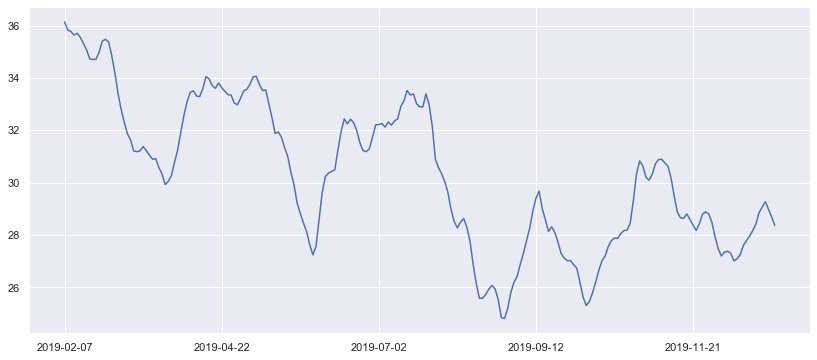

In [18]:
sns.set(rc={'figure.figsize':(14, 6)})
df_.loc['AAL'].plot()

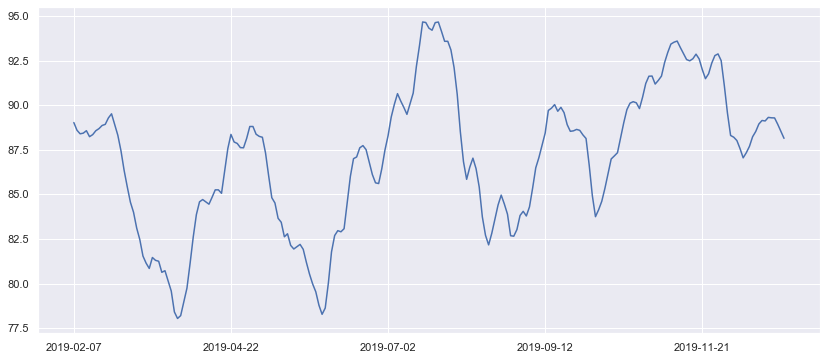

In [19]:
df_.loc['UAL'].plot()

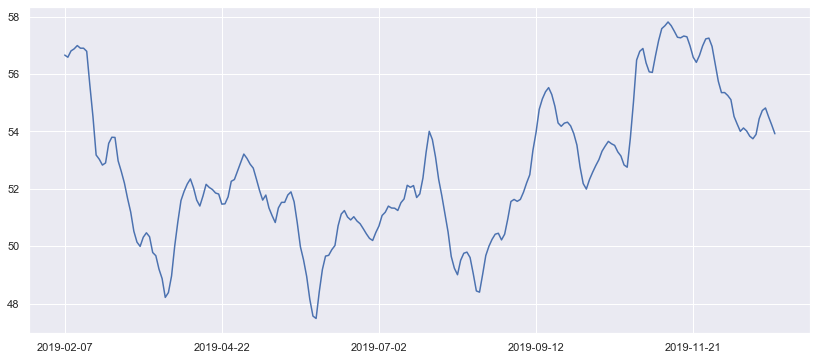

In [22]:
sns.set(rc={'figure.figsize':(14, 6)})
df_.loc['LUV'].plot()